Name: Dheephiga A M

Temp ID: WDGET2024067

Task - 10

Importing necessary libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>
Importing pandas library and loading the .csv file

In [9]:
df = pd.read_csv('sales_data.csv')

<br>
printing the first 5 rows of the dataset

In [3]:
df.head()

,OrderID,Product,Category,Price,Quantity,Date
0,1,ProductA,Electronics,500,2,2023-01-01
1,2,ProductB,Books,20,5,2023-01-02
2,3,ProductC,Electronics,800,1,2023-01-03
3,4,ProductA,Electronics,500,3,2023-01-04
4,5,ProductD,Clothing,50,4,2023-02-05


In [4]:
df.isna()

,OrderID,Product,Category,Price,Quantity,Date
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [5]:
df.isnull()

,OrderID,Product,Category,Price,Quantity,Date
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


There are no missing values in the provided dataset

<br>

Total sales revenue

In [37]:
#summing up the product quantity with the price its sold and using sum function to calculate the total sales
revenue = np.sum(df['Price'] * df['Quantity'])
print(f'Total sales revenue generated is {revenue}')


Total sales revenue generated is 6030


<br>

Top 5 selling products

In [32]:
#sorting based on quantities column to identify the most sold product
top_5 = df.sort_values('Quantity', ascending=False)
print(f' Top selling products are \n {top_5[['Product','Quantity']].head()}')

 Top selling products are 
     Product  Quantity
6  ProductB         6
1  ProductB         5
4  ProductD         4
3  ProductA         3
9  ProductD         3


<br>Average sales price for each category

In [58]:
#grouping the dataset by category
grouped_categories = df.groupby(['Category', 'Product']).agg({'Price': 'mean'})
print(grouped_categories)

                      Price
Category    Product        
Books       ProductB   20.0
            ProductE   30.0
Clothing    ProductD   50.0
Electronics ProductA  500.0
            ProductC  800.0


<br> Month With highest sales revenue

In [76]:
#changing the date column's datatype to datetime object
df['Date'] = pd.to_datetime(df['Date'])

#using month-name format to create a column called month
df['Month'] = df['Date'].dt.strftime('%B')

#calculating revenue for all products
df['Revenue'] = df['Quantity'] * df['Price']

#grouping the revenue with index as month
#summing up the values for each month
#sorting it to find the maximum sales 
groupby_month = df.groupby('Month')['Revenue'].sum().sort_values(ascending=False)

#printing the maximum sales month
print(f'\nMonth with highest Sales revenue is:\n{groupby_month.idxmax()}: {groupby_month.max()}')


Month with highest Sales revenue is:
January: 3400


<br> Plotting trends of revenue

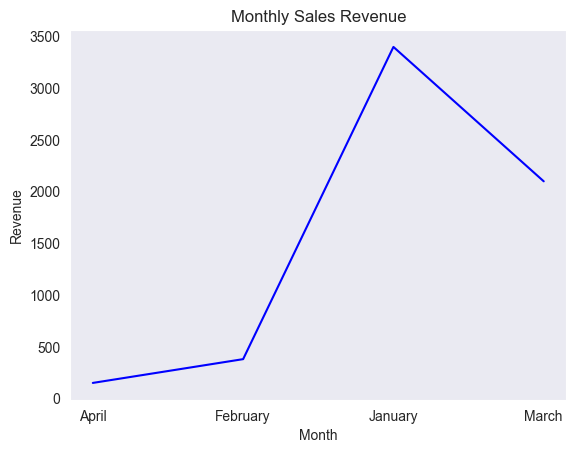

In [93]:
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()
#Monthly sales revenue
sns.set_style('dark')
sns.lineplot(x='Month', y='Revenue', data=monthly_revenue, color='blue')
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


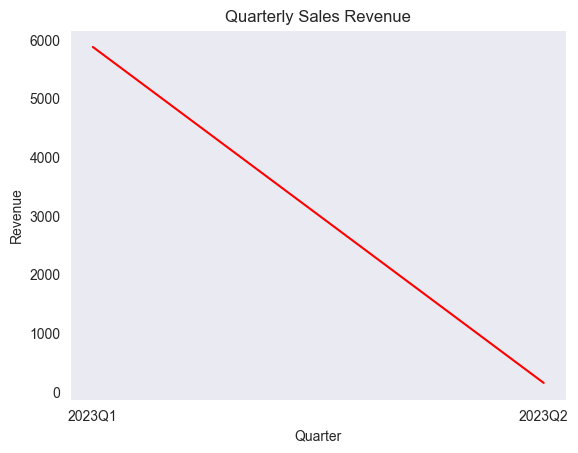

In [94]:
df['Quarter'] = df['Date'].dt.to_period('Q').astype(str)
quarterly_revenue = df.groupby('Quarter')['Revenue'].sum().reset_index()


#Quarterly sales revenue
sns.set_style('dark')
sns.lineplot(x='Quarter', y='Revenue', data=quarterly_revenue, color='red')
plt.title('Quarterly Sales Revenue')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.show()

<br>Plotting most sold product in each category

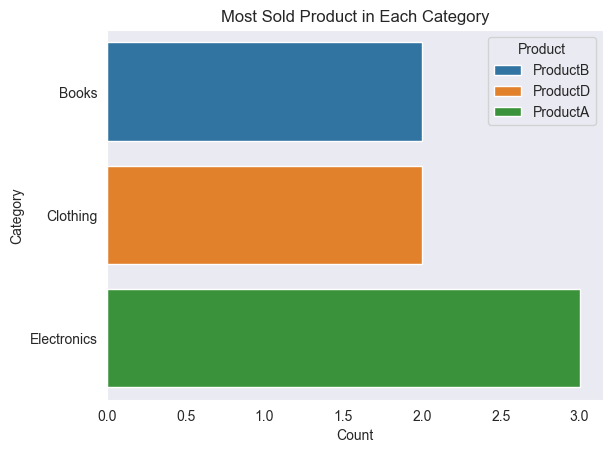

In [103]:

#Grouping by and then count the occurrences of each product within each category
top_products = df.groupby(['Category', 'Product']).size().reset_index(name='Count')

#Most sold product in each category
top_products = top_products.loc[top_products.groupby('Category')['Count'].idxmax()]

# Plot the most sold product in each category
sns.set_style('dark')
sns.barplot(x='Count', y='Category', hue='Product', data=top_products)
plt.title('Most Sold Product in Each Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.legend(title='Product', loc='upper right')
plt.show()
